# Following operations should be performed using Keras
- Import the necessary libraries

- Plot the sample images for all the classes

- Plot the distribution of images across the classes

- Build a data augmentation for train data to create new data with translation, rescale and flip, and rotation transformations. Rescale the image at 48x48

- Build a data augmentation for test data to create new data and rescale the image at 48x48

- Read images directly from the train folder and test folder using the appropriate function

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import matplotlib.pyplot as plt
import os
from keras.models import Sequential,Model
from keras.layers import Conv2D,Dense,Flatten,Dropout,BatchNormalization,MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications import DenseNet121
from glob import glob
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

print('Tensorflow Version:',tf.__version__)

Tensorflow Version: 2.9.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Files/Dataset_Detection_of_Lung_Infection.zip"

with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')

Done


In [ ]:
folders = glob('/content/data/train/*')

In [ ]:
len(folders)

3

In [ ]:
picture_size = 48
folder_path = '/content/data/'

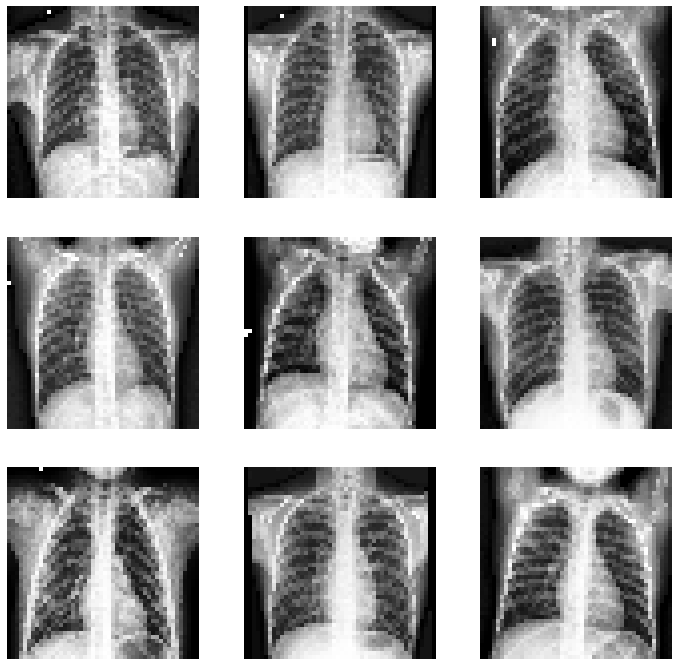

In [ ]:
expression = 'Healthy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+ os.listdir(folder_path + "train/" + expression)[i],
                   target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')
plt.show()

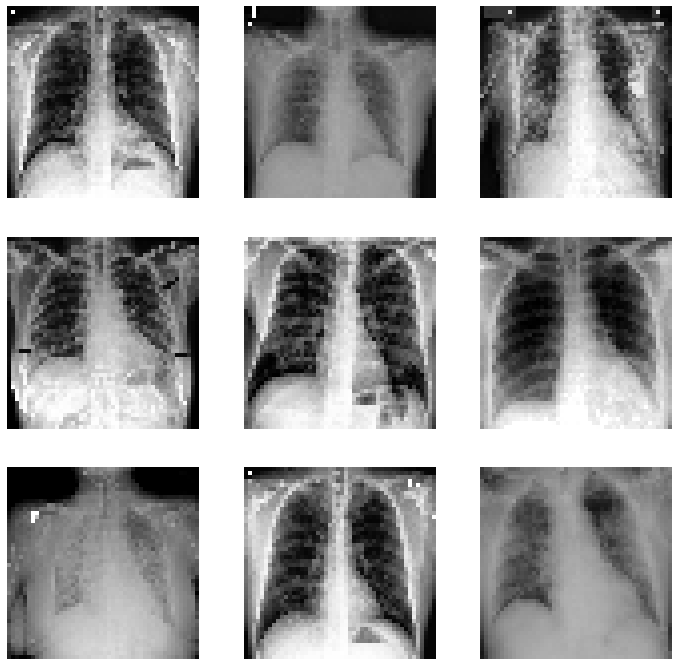

In [ ]:
expression = 'Type 1 disease'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+ os.listdir(folder_path + "train/" + expression)[i],
                   target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')
plt.show()

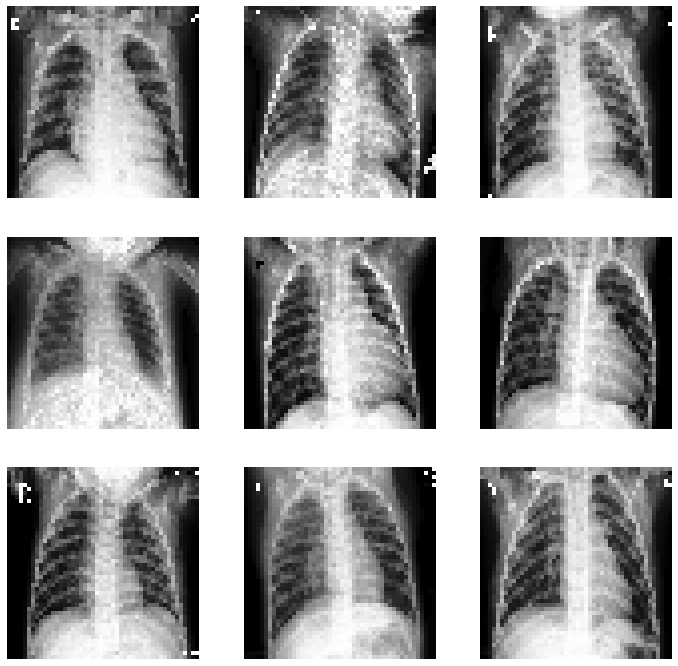

In [ ]:
expression = 'Type 2 disease'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+ os.listdir(folder_path + "train/" + expression)[i],
                   target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [ ]:
train_dir = '/content/data/train'
test_dir = '/content/data/test'

train_healthy_dir = '/content/data/train/Healthy'
train_Type1disease_dir = '/content/data/train/Type 1 disease'
train_Type2disease_dir = '/content/data/train/Type 2 disease'

test_healthy_dir = '/content/data/test/healthy'
test_Type1disease_dir = '/content/data/test/Type 1 disease'
test_Type2disease_dir = '/content/data/test/Type 2 disease'

dir_list = [train_healthy_dir,train_Type1disease_dir,train_Type2disease_dir,test_healthy_dir,test_Type1disease_dir,
           test_Type2disease_dir]

for d in dir_list:
    print(d,len(os.listdir(d)))

/content/data/train/Healthy 70
/content/data/train/Type 1 disease 111
/content/data/train/Type 2 disease 70
/content/data/test/healthy 20
/content/data/test/Type 1 disease 26
/content/data/test/Type 2 disease 20


In [ ]:
# image generator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(test_dir,
                                                             target_size=(224,224),
                                                             batch_size=32,
                                                             class_mode='categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


# Build 3 CNN model with:

# 1. CNN Architecture:

- Add convolutional layers with different filters, max pool layers, dropout layers, and batch normalization layers  

- Use Relu as an activation function

- Take the loss function as categorical cross-entropy

- Take rmsprop as an optimizer

- Use early stopping with the patience of two epochs and monitor the validation loss or accuracy

- Try with ten numbers epoch

- Train the model using a generator and test the accuracy of the test data at every epoch

- Plot the training and validation accuracy, and the loss

- Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [ ]:
model_cnn = Sequential()

# 1st CNN layer
model_cnn.add(Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Dropout(0.25))

# 2nd CNN Layer
model_cnn.add(Conv2D(32,(3,3),activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Dropout(0.25))

# 3rd CNN layer
model_cnn.add(Conv2D(64,(3,3),activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Dropout(0.25))

# 4th CNN Layer
model_cnn.add(Conv2D(64,(3,3),activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Dropout(0.25))

model_cnn.add(Flatten())

# Fully connected layer
model_cnn.add(Dense(512,activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.25))

model_cnn.add(Dense(3,activation='softmax'))

In [ ]:
model_cnn.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 32)     1

In [ ]:
early_stopping = EarlyStopping(patience=2,monitor='val_loss',restore_best_weights=True)

In [ ]:
 # Fit the model
history_cnn = model_cnn.fit(train_generator,
                            epochs=10,
                            batch_size=512,
                            verbose=1,
                            validation_data=validation_generator,
                            callbacks=early_stopping)

Epoch 1/10
8/8 [==============================] - 23s 2s/step - loss: 0.8889 - accuracy: 0.7450 - val_loss: 1.3755 - val_accuracy: 0.3030
Epoch 2/10
8/8 [==============================] - 12s 2s/step - loss: 0.4645 - accuracy: 0.8526 - val_loss: 4.6095 - val_accuracy: 0.3030
Epoch 3/10
8/8 [==============================] - 12s 2s/step - loss: 0.3945 - accuracy: 0.8845 - val_loss: 7.4954 - val_accuracy: 0.3030


In [ ]:
# Evaluate the result
test_loss, test_acc = model_cnn.evaluate(validation_generator,verbose=1)

print('Model Accuracy:',test_acc)
print('Model Loss:',test_loss)

3/3 [==============================] - 2s 544ms/step - loss: 1.3755 - accuracy: 0.3030
Model Accuracy: 0.3030303120613098
Model Loss: 1.375476598739624


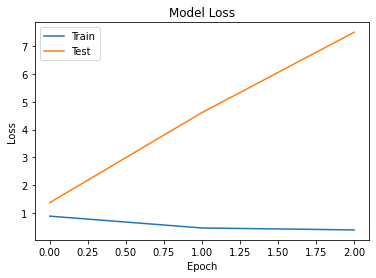

In [ ]:
# PLot the model loss
plt.plot(history_cnn.history['loss'],label='Train')
plt.plot(history_cnn.history['val_loss'],label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

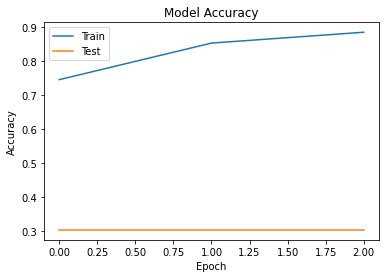

In [ ]:
# PLot the model Accuracy
plt.plot(history_cnn.history['accuracy'],label='Train')
plt.plot(history_cnn.history['val_accuracy'],label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# 2. Transfer learning using mobile net:

- Prepare data for the pre-trained mobile net model, with color mode as RGB

- Create an instance of a mobile net pre-trained model

- Add dense layer, dropout layer, batch normalization layer on the pre-trained model

- Create a final output layer with a SoftMax activation function

- Change the batch size activation function and optimize as rmsprop and observe if the accuracy increases

- Take the loss function as categorical cross-entropy

- Use early stopping with the patience of two epoch and call back function for preventing overfitting

- Try with ten numbers epoch

- Train the model using a generator and test the accuracy of the test data at every epoch

- Plot the training and validation accuracy, and the loss

- Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [ ]:
IMAGE_SIZE = [224, 224]
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(mobilenet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model_mobilenet = Model(inputs=mobilenet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model_mobilenet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model_mobilenet.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(patience=2,monitor='val_loss',restore_best_weights=True)

In [ ]:
history_mobilenet = model_mobilenet.fit(train_generator,
                                        epochs=10,
                                        batch_size=512,
                                        verbose=1,
                                        validation_data=validation_generator,
                                        callbacks=early_stopping)

Epoch 1/10
8/8 [==============================] - 16s 2s/step - loss: 10.0916 - accuracy: 0.6215 - val_loss: 33.4734 - val_accuracy: 0.0455
Epoch 2/10
8/8 [==============================] - 12s 1s/step - loss: 0.9513 - accuracy: 0.8924 - val_loss: 36.9734 - val_accuracy: 0.2273
Epoch 3/10
8/8 [==============================] - 12s 2s/step - loss: 1.7792 - accuracy: 0.8526 - val_loss: 40.9474 - val_accuracy: 0.2727


In [ ]:
# Evaluate the result
test_loss, test_acc = model_mobilenet.evaluate(validation_generator,verbose=1)

print('Model Accuracy:',test_acc)
print('Model Loss:',test_loss)

3/3 [==============================] - 1s 341ms/step - loss: 33.4734 - accuracy: 0.0455
Model Accuracy: 0.04545454680919647
Model Loss: 33.473411560058594


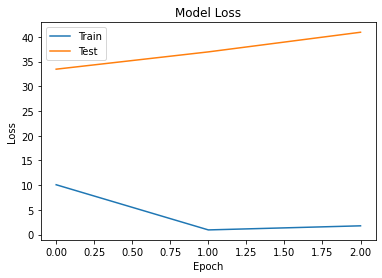

In [ ]:
# PLot the model loss
plt.plot(history_mobilenet.history['loss'],label='Train')
plt.plot(history_mobilenet.history['val_loss'],label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

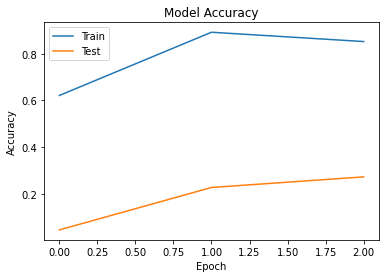

In [ ]:
# PLot the model Accuracy
plt.plot(history_mobilenet.history['accuracy'],label='Train')
plt.plot(history_mobilenet.history['val_accuracy'],label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# 3. Transfer Learning using Densenet121:

- Prepare the dataset for the transfer learning algorithm using Densenet121 with the image size as 224x224x3

- Freeze the top layers of the pre-trained model

- Add a dense layer at the end of the pre-trained model followed by a dropout layer and try various combinations to get an accuracy

- Add the final output layer with a SoftMax activation function

- Take loss function as categorical cross-entropy

- Take Adam as an optimizer

- Use early stopping to prevent overfitting

- Try with 15 number of epoch and batch size with seven, also try various values to see the impact on results

- Train the model using the generator and test the accuracy of the test data at every epoch

- Plot the training and validation accuracy, and the loss

- Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [ ]:
IMAGE_SIZE = [224, 224]
den = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in den.layers:
    layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(den.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model_densenet = Model(inputs=den.input, outputs=prediction)

In [ ]:
# view the structure of the model
model_densenet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [ ]:
# tell the model what cost and optimization method to use
model_densenet.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(patience=5,monitor='val_loss',restore_best_weights=True)

In [ ]:
history_densenet = model_densenet.fit(train_generator,
                            epochs=15,
                            verbose=1,
                            callbacks=early_stopping,
                            validation_data=validation_generator)

Epoch 1/15
8/8 [==============================] - 28s 2s/step - loss: 4.1203 - accuracy: 0.5378 - val_loss: 12.1492 - val_accuracy: 0.1212
Epoch 2/15
8/8 [==============================] - 12s 2s/step - loss: 0.8823 - accuracy: 0.8765 - val_loss: 19.8642 - val_accuracy: 0.0152
Epoch 3/15
8/8 [==============================] - 13s 2s/step - loss: 0.3559 - accuracy: 0.9442 - val_loss: 21.9738 - val_accuracy: 0.0303
Epoch 4/15
8/8 [==============================] - 12s 2s/step - loss: 0.3962 - accuracy: 0.9562 - val_loss: 23.1361 - val_accuracy: 0.0606
Epoch 5/15
8/8 [==============================] - 12s 2s/step - loss: 0.1701 - accuracy: 0.9522 - val_loss: 23.3491 - val_accuracy: 0.0455
Epoch 6/15
8/8 [==============================] - 13s 2s/step - loss: 0.1223 - accuracy: 0.9562 - val_loss: 23.0676 - val_accuracy: 0.0606


In [ ]:
# Evaluate the result
test_loss, test_acc = model_densenet.evaluate(validation_generator,verbose=1)

print('Model Accuracy:',test_acc)
print('Model Loss:',test_loss)

3/3 [==============================] - 1s 335ms/step - loss: 12.1492 - accuracy: 0.1212
Model Accuracy: 0.12121212482452393
Model Loss: 12.14915943145752


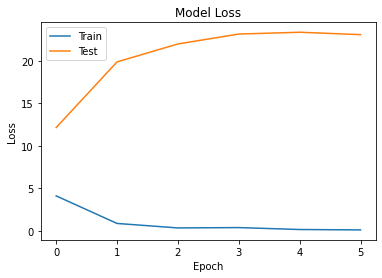

In [ ]:
# PLot the model loss
plt.plot(history_densenet.history['loss'],label='Train')
plt.plot(history_densenet.history['val_loss'],label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

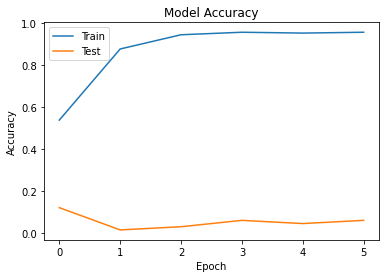

In [ ]:
# PLot the model Accuracy
plt.plot(history_densenet.history['accuracy'],label='Train')
plt.plot(history_densenet.history['val_accuracy'],label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# Combined the loss Plot

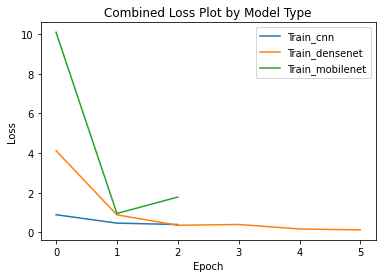

In [ ]:
# Plot the all loss result on one graph
plt.plot(history_cnn.history['loss'])
plt.plot(history_densenet.history['loss'])
plt.plot(history_mobilenet.history['loss'])

plt.title('Combined Loss Plot by Model Type')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_cnn','Train_densenet','Train_mobilenet'],loc='best')
plt.show()

# Combined the Accuracy PLot

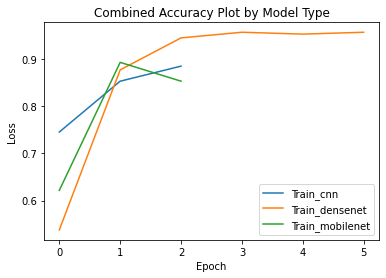

In [ ]:
# Plot the all loss result on one graph
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_densenet.history['accuracy'])
plt.plot(history_mobilenet.history['accuracy'])

plt.title('Combined Accuracy Plot by Model Type')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_cnn','Train_densenet','Train_mobilenet'],loc='best')
plt.show()

# Final step:   

- Compare all the models on the basis of accuracy, precision, recall, and f1-score

3/3 [==============================] - 1s 295ms/step
Confusion Matrix
[[ 0 26  0]
 [ 0 20  0]
 [ 0 20  0]]


Text(33.0, 0.5, 'Truth')

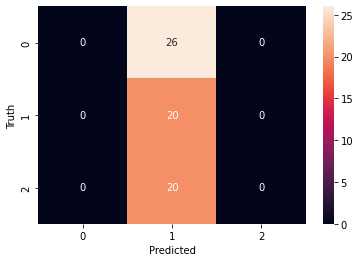

In [ ]:
# CNN model:-

y_pred = model_cnn.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(validation_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.30      1.00      0.47        20
           2       0.00      0.00      0.00        20

    accuracy                           0.30        66
   macro avg       0.10      0.33      0.16        66
weighted avg       0.09      0.30      0.14        66



3/3 [==============================] - 3s 386ms/step
Confusion Matrix
[[ 9 10  7]
 [ 6  9  5]
 [ 4  6 10]]


Text(33.0, 0.5, 'Truth')

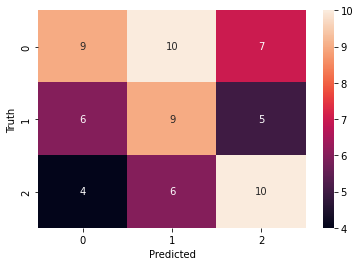

In [ ]:
# DenseNet Pretrained model:-

y_pred = model_densenet.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(validation_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.35      0.40        26
           1       0.36      0.45      0.40        20
           2       0.45      0.50      0.48        20

    accuracy                           0.42        66
   macro avg       0.43      0.43      0.43        66
weighted avg       0.43      0.42      0.42        66



3/3 [==============================] - 1s 280ms/step
Confusion Matrix
[[9 8 9]
 [7 9 4]
 [2 9 9]]


Text(24.0, 0.5, 'Truth')

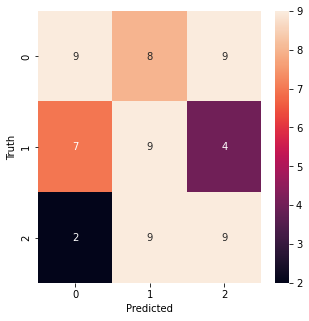

In [ ]:
# MobileNet Pretrained Model:-

y_pred = model_mobilenet.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(validation_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        26
           1       0.35      0.45      0.39        20
           2       0.41      0.45      0.43        20

    accuracy                           0.41        66
   macro avg       0.42      0.42      0.41        66
weighted avg       0.43      0.41      0.41        66

